In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

First few rows of 2D dataset:
   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  

First few rows of MNIST dataset:
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0

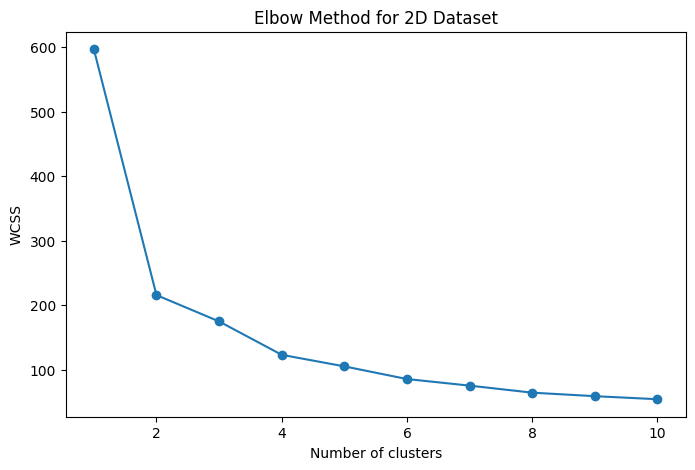

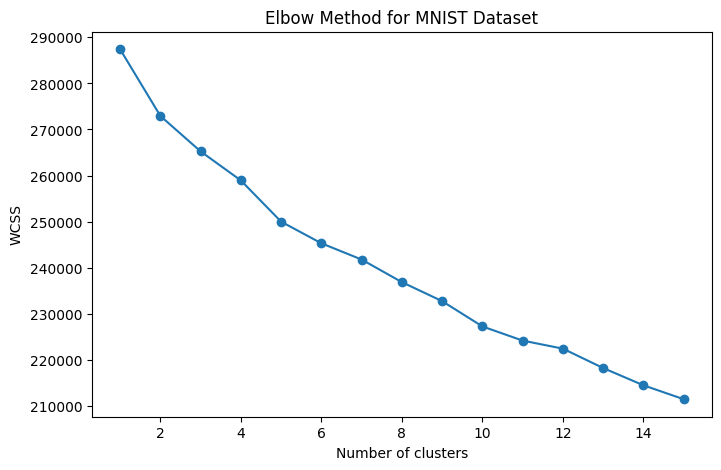

In [5]:
# Завантаження даних
data_2d = pd.read_csv('data/data_2d.csv')
mnist_data = pd.read_csv('data/mnist.csv')

# Перевірка перших кількох рядків датасетів
print("First few rows of 2D dataset:")
print(data_2d.head())

print("\nFirst few rows of MNIST dataset:")
print(mnist_data.head())

# Масштабування даних
scaler = StandardScaler()
data_2d_scaled = scaler.fit_transform(data_2d)
mnist_data_scaled = scaler.fit_transform(mnist_data)

# Функція для побудови графіку ліктевого методу
def plot_elbow_method(X, max_clusters=10, title='Elbow Method for K-means'):
    wcss = []  # Список для збереження значень WCSS (Within-cluster sum of squares)
    
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Застосування K-means і побудова графіку ліктевого методу для двовимірного датасету
plot_elbow_method(data_2d_scaled, title='Elbow Method for 2D Dataset')

# Застосування K-means і побудова графіку ліктевого методу для MNIST датасету
plot_elbow_method(mnist_data_scaled, max_clusters=15, title='Elbow Method for MNIST Dataset')


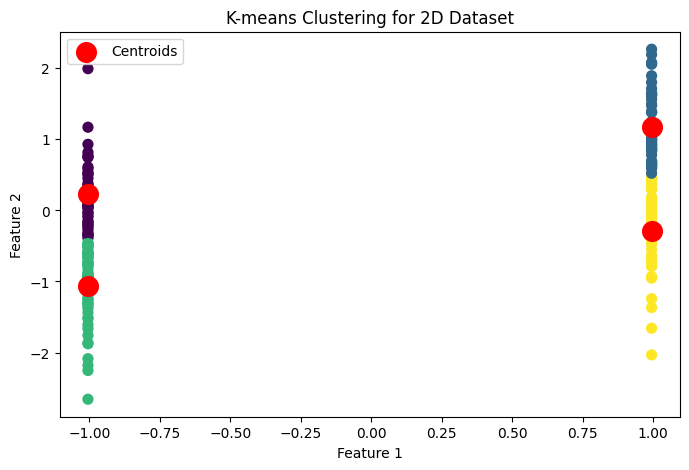

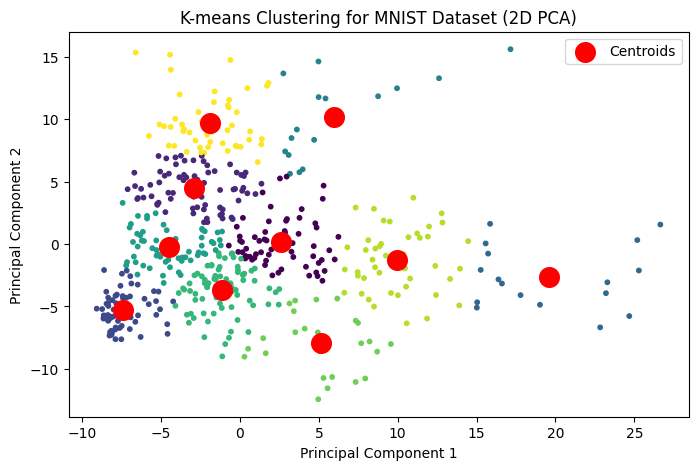

In [6]:
# Вибір оптимальної кількості кластерів після аналізу ліктевого методу
optimal_clusters_2d = 4  # для 2D датасету (виберіть оптимальне значення)
optimal_clusters_mnist = 10  # для MNIST датасету (виберіть оптимальне значення)

# Кластеризація для 2D датасету
kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, init='k-means++', random_state=42)
clusters_2d = kmeans_2d.fit_predict(data_2d_scaled)

# Візуалізація результатів кластеризації для 2D датасету
plt.figure(figsize=(8, 5))
plt.scatter(data_2d_scaled[:, 0], data_2d_scaled[:, 1], c=clusters_2d, cmap='viridis', s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering for 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Зменшення розмірності MNIST датасету до 2D за допомогою PCA
pca = PCA(n_components=2)
mnist_data_pca = pca.fit_transform(mnist_data_scaled)

# Кластеризація для MNIST датасету
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, init='k-means++', random_state=42)
clusters_mnist = kmeans_mnist.fit_predict(mnist_data_pca)

# Візуалізація результатів кластеризації для MNIST датасету після PCA
plt.figure(figsize=(8, 5))
plt.scatter(mnist_data_pca[:, 0], mnist_data_pca[:, 1], c=clusters_mnist, cmap='viridis', s=10)
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering for MNIST Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()